In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [8]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels
feature_names = iris.feature_names  # Feature names

# Convert to a DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Exploratory Data Analysis (EDA)
print("Summary statistics of the features:")
print(df.describe())

Summary statistics of the features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [9]:

print("\nData types and null values:")
print(df.info())



Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


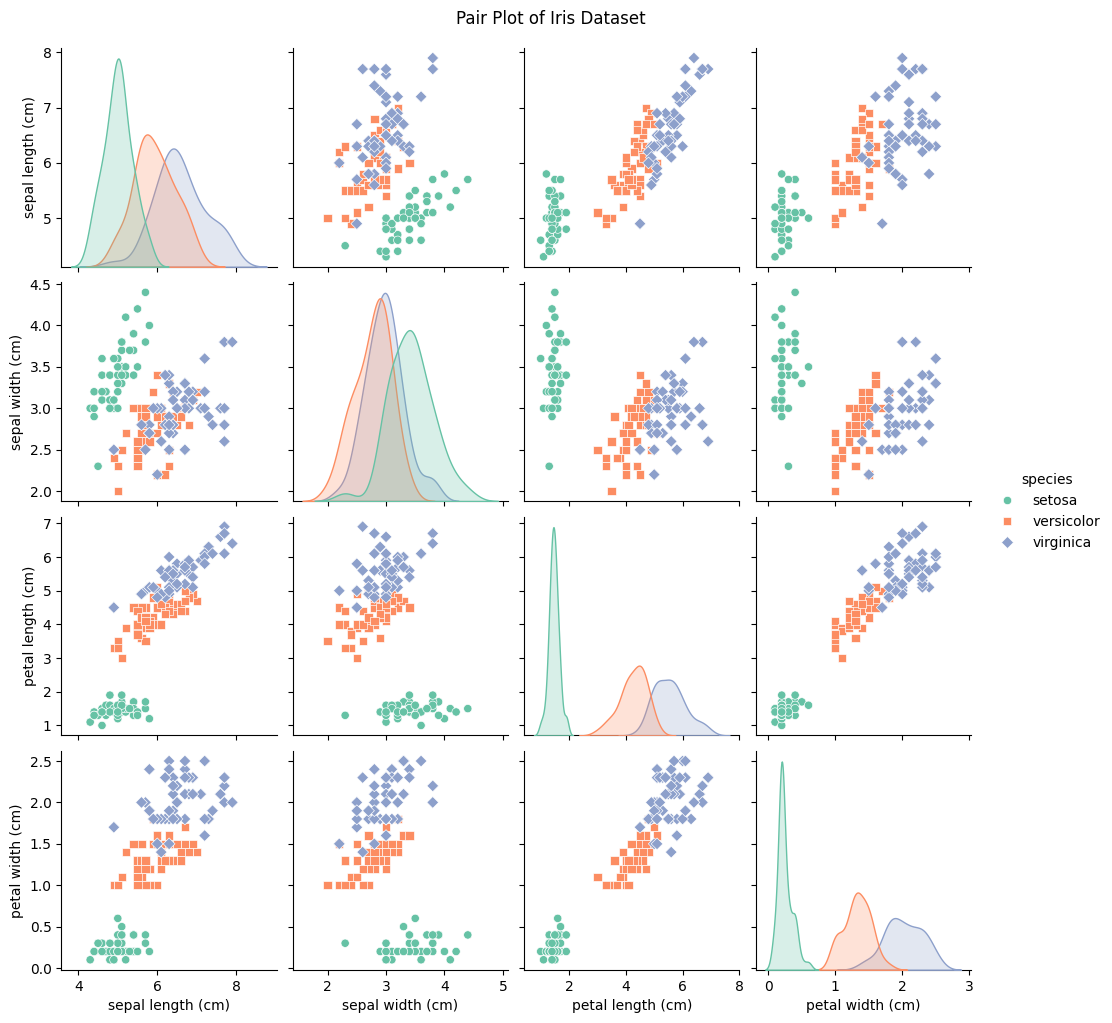

In [10]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)  # Title for the plot
plt.show()

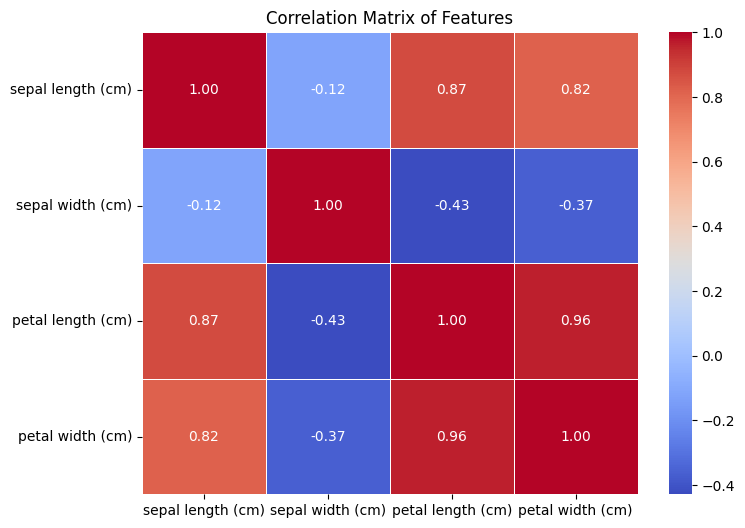

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[feature_names].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


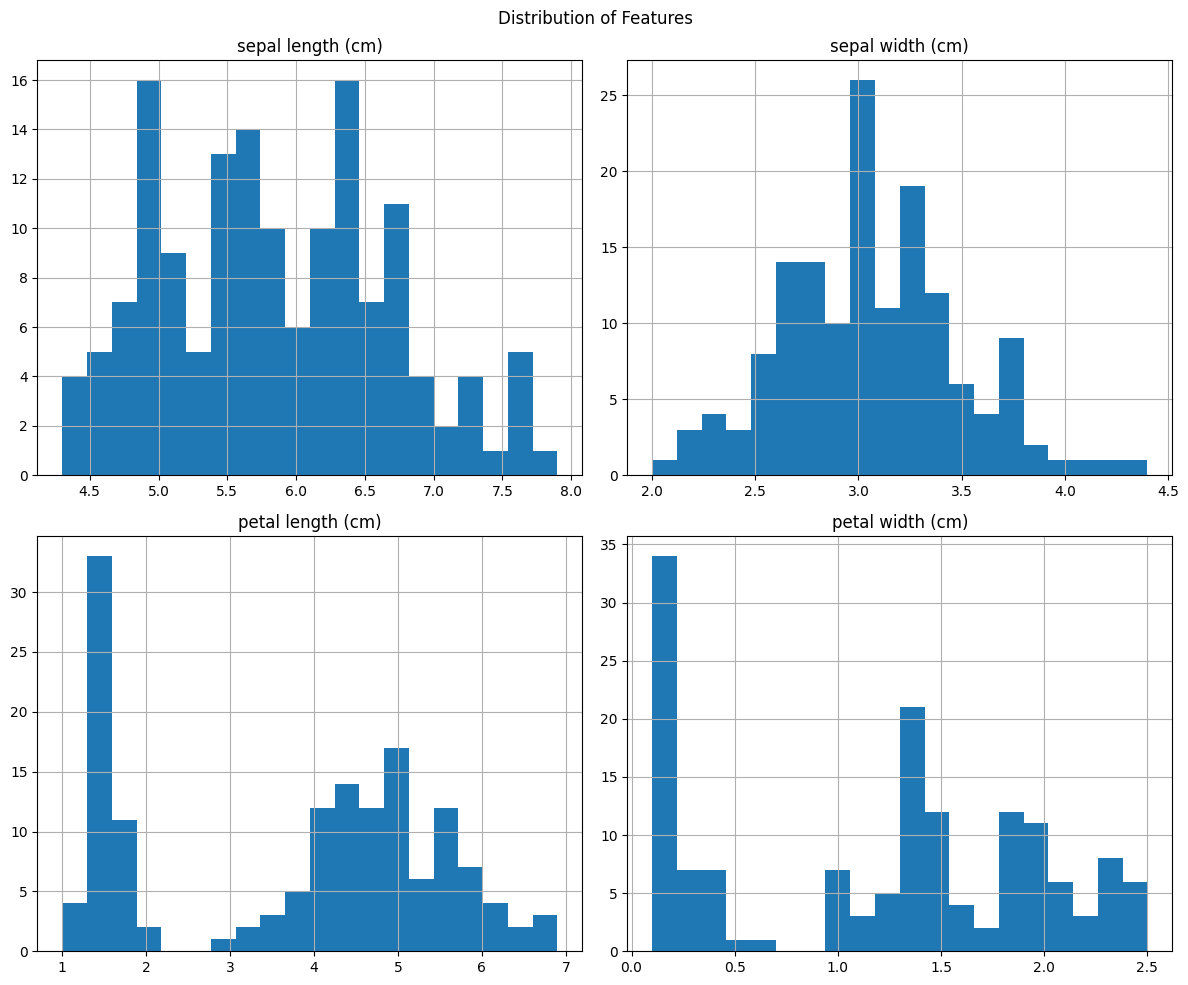

In [12]:
# Distribution of each feature
df[feature_names].hist(bins=20, figsize=(12, 10))
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()

In [13]:
# Now, let's perform Logistic Regression
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")

Accuracy of Logistic Regression model: 1.00
